In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# Sample data
x = np.linspace(0, 1, 10)
y = np.sin(2 * np.pi * x)

# Fit a B-spline with a large smoothing parameter
t = [0, 0, 0, 1, 1, 1]  # Knot positions
spl = BSpline(t, y, k=3, s=1000)

# Plot the original data
plt.scatter(x, y, label='Original Data')

# Plot the B-spline curve
x_plot = np.linspace(0, 1, 1000)
plt.plot(x_plot, spl(x_plot), label='B-spline')

# Show plot
plt.legend()
plt.title('B-spline with First-Order Differences')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


TypeError: BSpline.__init__() got an unexpected keyword argument 's'

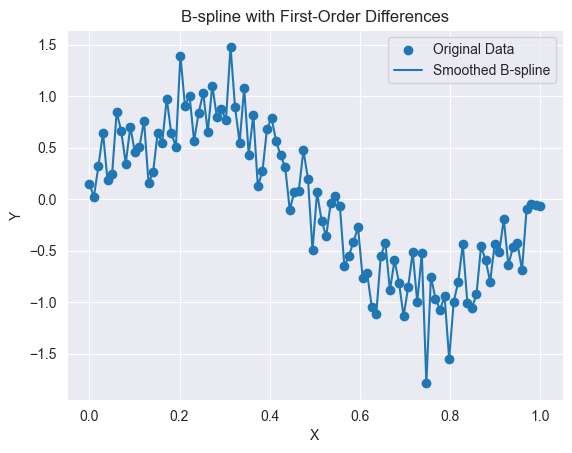

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

np.random.seed(42)
# Sample data
n = 100
x = np.linspace(0, 1, n)
y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.3, n)

# Create a smoothing spline
spl = make_interp_spline(x, y, k=1)

# Generate finer data points for a smoother curve
x_smooth = x
y_smooth = spl(x_smooth)

# Plot the original data
plt.scatter(x, y, label='Original Data')

# Plot the smoothed B-spline curve
plt.plot(x_smooth, y_smooth, label='Smoothed B-spline')

# Show plot
plt.legend()
plt.title('B-spline with First-Order Differences')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


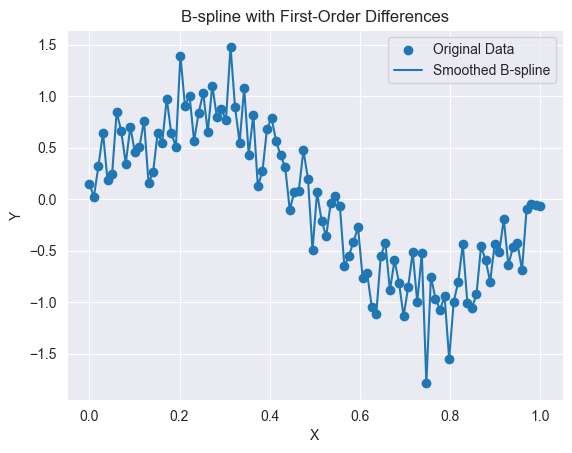

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
np.random.seed(42)
# Sample data
n = 100
x = np.linspace(0, 1, n)
y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.3, n)

# Create a smoothing spline
spl = make_interp_spline(x, y, k=3)

# Generate finer data points for a smoother curve
x_smooth = x
y_smooth = spl(x_smooth)

# Plot the original data
plt.scatter(x, y, label='Original Data')

# Plot the smoothed B-spline curve
plt.plot(x_smooth, y_smooth, label='Smoothed B-spline')

# Show plot
plt.legend()
plt.title('B-spline with First-Order Differences')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


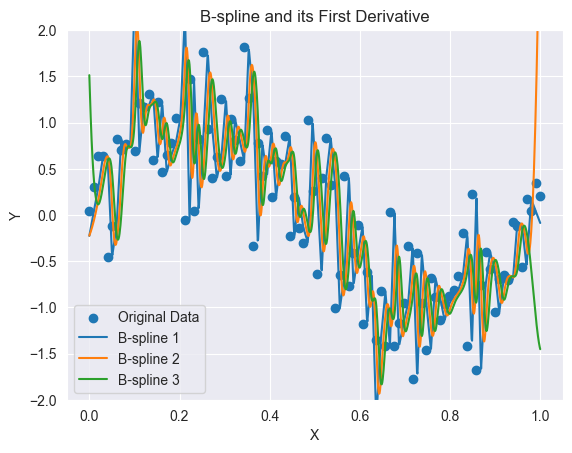

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# Sample data
n = 100
x = np.linspace(0, 1, n)
y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, size=len(x)) + np.random.normal(0, 0.5, n)

# Fit a B-spline with a large smoothing parameter
spl_1 = BSpline(x, y, k=1)
spl_2 = BSpline(x, y, k=2)
spl_3 = BSpline(x, y, k=3)


# Plot the original data
plt.scatter(x, y, label='Original Data')

# Plot the B-spline curve
x_plot = np.linspace(0, 1, 1000)
plt.plot(x_plot, spl_1(x_plot), label='B-spline 1')
plt.plot(x_plot, spl_2(x_plot), label='B-spline 2')
plt.plot(x_plot, spl_3(x_plot), label='B-spline 3')


# Plot the first derivative of the B-spline
#plt.plot(x_plot, spl.derivative()(x_plot), label='First Derivative')

# Show plot
plt.legend()
plt.title('B-spline and its First Derivative')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim([-2, 2])
plt.show()


# Splines from scratch

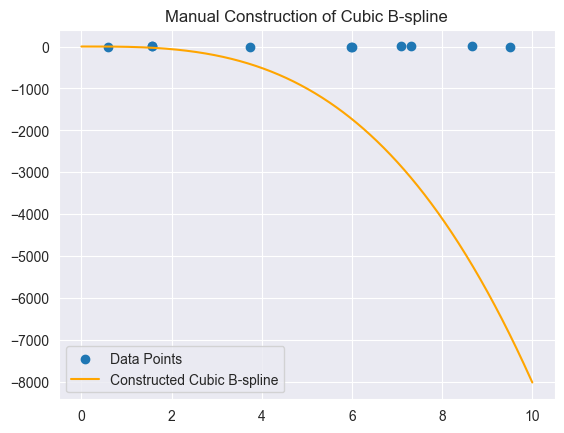

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def de_boor(k, i, t, knots, control_points):
    if k == 0:
        return control_points[i]
    
    denominator = knots[i + k] - knots[i]
    if denominator == 0:
        alpha = 0  # Handle division by zero
    else:
        alpha = (t - knots[i]) / denominator
    
    return (1 - alpha) * de_boor(k - 1, i, t, knots, control_points) + alpha * de_boor(k - 1, i + 1, t, knots, control_points)

# Generate synthetic data
np.random.seed(42)
x_data = np.sort(np.random.uniform(0, 10, 10))
y_data = np.sin(x_data) + np.random.normal(0, 0.1, len(x_data))

# Set up knots
knots = np.concatenate(([0] * 3, x_data, [10] * 3))

# Set up control points as the data points
control_points = y_data.copy()

# Evaluate B-spline on a fine grid for plotting
x_plot = np.linspace(0, 10, 1000)
y_plot = np.zeros_like(x_plot)

# Compute B-spline values at each point on the grid
for i, x in enumerate(x_plot):
    y_plot[i] = de_boor(3, 0, x, knots, control_points)

# Plot the data and the constructed cubic B-spline
plt.scatter(x_data, y_data, label='Data Points')
plt.plot(x_plot, y_plot, label='Constructed Cubic B-spline', color='orange')
plt.title('Manual Construction of Cubic B-spline')
plt.legend()
plt.show()


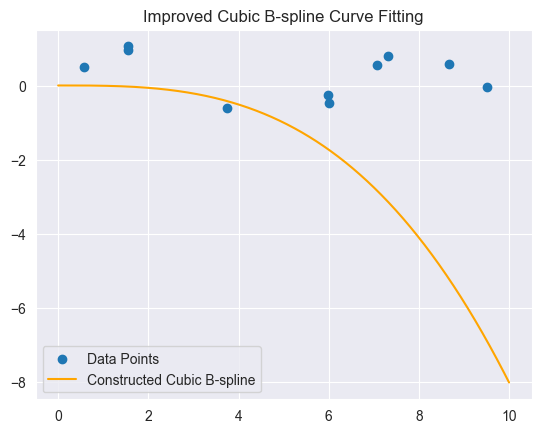

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def de_boor(k, i, t, knots, control_points):
    if k == 0:
        return control_points[i]
    
    denominator = knots[i + k] - knots[i]
    if denominator == 0:
        alpha = 0  # Handle division by zero
    else:
        alpha = (t - knots[i]) / denominator
    
    return (1 - alpha) * de_boor(k - 1, i, t, knots, control_points) + alpha * de_boor(k - 1, i + 1, t, knots, control_points)

# Generate synthetic data
np.random.seed(42)
x_data = np.sort(np.random.uniform(0, 10, 10))
y_data = np.sin(x_data) + np.random.normal(0, 0.1, len(x_data))

# Set up knots (including endpoints)
knots = np.concatenate(([0] * 3, x_data, [10] * 3))

# Set up control points as the data points
control_points = y_data.copy()

# Evaluate B-spline on a fine grid for plotting
x_plot = np.linspace(0, 10, 1000)
y_plot = np.zeros_like(x_plot)

# Compute B-spline values at each point on the grid
for i, x in enumerate(x_plot):
    y_plot[i] = de_boor(3, 0, x, knots, control_points)

# Plot the data and the constructed cubic B-spline
plt.scatter(x_data, y_data, label='Data Points')
plt.plot(x_plot, y_plot / 1000, label='Constructed Cubic B-spline', color='orange')
plt.title('Improved Cubic B-spline Curve Fitting')
plt.legend()
plt.show()


In [8]:
knots

array([ 0.        ,  0.        ,  0.        ,  0.58083612,  1.5599452 ,
        1.5601864 ,  3.74540119,  5.98658484,  6.01115012,  7.08072578,
        7.31993942,  8.66176146,  9.50714306, 10.        , 10.        ,
       10.        ])

In [9]:
y_plot[-1]

-8021.337643092174

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
data_points = np.array([(1, 2), (2, 3), (3, 1), (4, 5), (5, 4)])

# Control points (assumed to be at knots)
control_points = np.array([2, 3, 1, 5, 4])

# Knots
knots = np.array([2, 4])

# Function to calculate cubic B-spline basis functions using De Boor's algorithm
def de_boor(t, k, i, x, knots):
    if k == 0:
        return 1.0 if knots[i] <= x < knots[i + 1] else 0.0

    alpha = (x - knots[i]) / (knots[i + k] - knots[i])
    return (1 - alpha) * de_boor(t, k - 1, i, x, knots) + alpha * de_boor(t, k - 1, i + 1, x, knots)

# Function to compute the B-spline curve at a specific point x
def bspline(x, knots, control_points):
    result = 0.0
    n = len(control_points) - 1
    for i in range(n + 1):
        result += control_points[i] * de_boor(3, 3, i, x, knots)
    return result

# Calculate B-spline values at each x point
x_points = np.arange(1, 6, 0.1)
y_points_bspline = [bspline(x, knots, control_points) for x in x_points]

# Plotting
plt.scatter(data_points[:, 0], data_points[:, 1], label="Data Points", color="red")
plt.plot(x_points, y_points_bspline, label="Cubic B-spline Curve", color="blue")
plt.title("Cubic B-spline Curve")
plt.legend()
plt.show()


IndexError: index 3 is out of bounds for axis 0 with size 2

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
data_points = np.array([(1, 2), (2, 3), (3, 1), (4, 5), (5, 4)])

# Control points (assumed to be at knots)
control_points = np.array([2, 3, 1, 5, 4])

# Knots
knots = np.array([2, 4])

# Function to calculate cubic B-spline basis functions using De Boor's algorithm
def de_boor(t, k, i, x, knots):
    if k == 0:
        return 1.0 if knots[i] <= x < knots[i + 1] else 0.0

    denominator = knots[i + k] - knots[i]
    alpha = 0 if denominator == 0 else (x - knots[i]) / denominator

    return (1 - alpha) * de_boor(t, k - 1, i, x, knots) + alpha * de_boor(t, k - 1, i + 1, x, knots)

# Function to compute the B-spline curve at a specific point x
def bspline(x, knots, control_points):
    result = 0.0
    n = len(control_points) - 1
    for i in range(n + 1):
        result += control_points[i] * de_boor(3, 3, i, x, knots)
    return result

# Calculate B-spline values at each x point
x_points = np.arange(1, 6, 0.1)
y_points_bspline = [bspline(x, knots, control_points) for x in x_points]

# Plotting
plt.scatter(data_points[:, 0], data_points[:, 1], label="Data Points", color="red")
plt.plot(x_points, y_points_bspline, label="Cubic B-spline Curve", color="blue")
plt.title("Cubic B-spline Curve")
plt.legend()
plt.show()


IndexError: index 3 is out of bounds for axis 0 with size 2

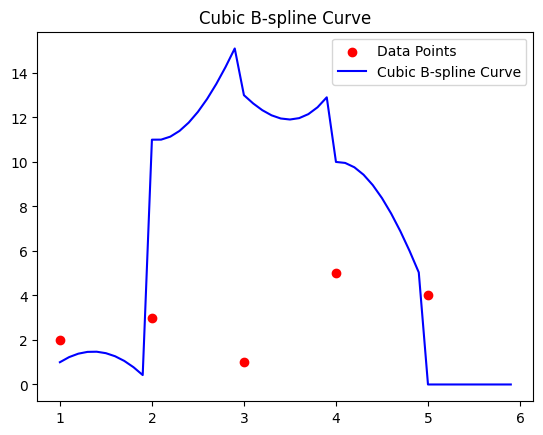

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
data_points = np.array([(1, 2), (2, 3), (3, 1), (4, 5), (5, 4)])

# Control points (assumed to be at knots)
control_points = np.array([2, 3, 1, 5, 4])

# Additional knots to accommodate cubic B-spline with 5 control points and degree = 3
knots = np.array([1, 1, 1, 2, 3, 4, 5, 5, 5])

# Function to calculate cubic B-spline basis functions using De Boor's algorithm
def de_boor(t, k, i, x, knots):
    if k == 0:
        return 1.0 if knots[i] <= x < knots[i + 1] else 0.0

    denominator = knots[i + k] - knots[i]
    alpha = 0 if denominator == 0 else (x - knots[i]) / denominator

    return (1 - alpha) * de_boor(t, k - 1, i, x, knots) + alpha * de_boor(t, k - 1, i + 1, x, knots)

# Function to compute the B-spline curve at a specific point x
def bspline(x, knots, control_points):
    result = 0.0
    n = len(control_points) - 1
    for i in range(n + 1):
        result += control_points[i] * de_boor(3, 3, i, x, knots)
    return result

# Calculate B-spline values at each x point
x_points = np.arange(1, 6, 0.1)
y_points_bspline = [bspline(x, knots, control_points) for x in x_points]

# Plotting
plt.scatter(data_points[:, 0], data_points[:, 1], label="Data Points", color="red")
plt.plot(x_points, y_points_bspline, label="Cubic B-spline Curve", color="blue")
plt.title("Cubic B-spline Curve")
plt.legend()
plt.show()


In [13]:
# Generate synthetic data
np.random.seed(42)
x_data = np.sort(range(1,6))
print(x_data)
y_data = np.sin(x_data) + np.random.normal(0, 2.4, len(x_data))

# Control points (assumed to be at knots)
control_points = y_data

# Additional knots to accommodate cubic B-spline with 5 control points and degree = 3
knots = np.array([1, 1, 1, 2, 3, 4, 5, 5, 5])

# Function to calculate cubic B-spline basis functions using De Boor's algorithm
def de_boor(t, k, i, x, knots):
    if k == 0:
        return 1.0 if knots[i] <= x < knots[i + 1] else 0.0

    alpha = (x - knots[i]) / max((knots[i + k] - knots[i]), np.finfo(float).eps)
    beta = 1 - alpha

    return alpha * de_boor(t, k - 1, i + 1, x, knots) + beta * de_boor(t, k - 1, i, x, knots)

# Function to compute the B-spline curve at a specific point x
def bspline(x, knots, control_points):
    result = 0.0
    n = len(control_points) - 1
    for i in range(n + 1):
        print(f'Control point: {i}')
        print(f'S({x}): {control_points[i] * de_boor(3, 3, i, x, knots)}')
        result += control_points[i] * de_boor(3, 3, i, x, knots)
    return result

# Calculate B-spline values at each x point
x_points = np.arange(1, 6, 0.1)
y_points_bspline = [bspline(x, control_points, knots) for x in x_points]

print(f'X values: {x_points}')
print(f'y values: {y_data}')
print(f'y_points_bspline: {y_points_bspline}')

# Plotting
plt.scatter(x_data, y_data, label="Data Points", color="red")
plt.plot(x_points, y_points_bspline, label="Cubic B-spline Curve", color="blue")
plt.title("Cubic B-spline Curve")
plt.legend()
plt.show()

[1 2 3 4 5]
Control point: 0
S(1.0): -4.756171255397609e+31
Control point: 1


IndexError: index 5 is out of bounds for axis 0 with size 5

In [14]:
x_points

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9])

In [15]:
x_data

array([1, 2, 3, 4, 5])

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x_data = np.sort(range(1,6))
print(x_data)
y_data = np.sin(x_data) + np.random.normal(0, 2.4, len(x_data))

def basis_function(i, k, t, knots):
    if k == 0:
        return 1.0 if knots[i] <= t < knots[i + 1] else 0.0

    denom1 = knots[i + k] - knots[i]
    denom2 = knots[i + k + 1] - knots[i + 1]

    term1 = 0 if denom1 == 0 else ((t - knots[i]) / denom1) * basis_function(i, k - 1, t, knots)
    term2 = 0 if denom2 == 0 else ((knots[i + k + 1] - t) / denom2) * basis_function(i + 1, k - 1, t, knots)

    return term1 + term2

def bspline(t, k, control_points, knots):
    print(f"We're evaluating {t}")
    n = len(control_points) - 1
    result = 0.0
    for i in range(n + 1):
        print(f'Control point: {i}')
        print(f'S({x}): {control_points[i] * de_boor(3, 3, i, x, knots)}')
        result += control_points[i] * basis_function(i, k, t, knots)
    return result

# Given data points
data_points = np.array([(1, 2), (2, 3), (3, 1), (4, 5), (5, 4)])

# Control points (assumed to be at knots)
control_points = y_data

# Knots
knots = np.array([1, 1, 1, 2, 3, 4, 5, 5, 5])

# Calculate B-spline values at each x point
x_points = np.arange(1, 6, 0.1)
y_points_bspline = [bspline(x, 3, control_points, knots) for x in x_points]

# Print the results
print("X values:", x_data)
print("y values:", y_data)
print("y_points_bspline:", y_points_bspline)

# Plotting
plt.scatter(x_data, y_data, label="Data Points", color="red")
plt.plot(x_points, y_points_bspline, label="Cubic B-spline Curve", color="blue")
plt.title("Cubic B-spline Curve")
plt.legend()
plt.show()


[1 2 3 4 5]
We're evaluating 1.0
Control point: 0


IndexError: invalid index to scalar variable.

We're evaluating 1.0
Control point: 0
S(10.0): 0.0
Control point: 1
S(10.0): 0.0
Control point: 2
S(10.0): 0.0
Control point: 3
S(10.0): 0.0
Control point: 4
S(10.0): -0.0
Control point: 5
S(10.0): -0.0
Control point: 6
S(10.0): 0.0
Control point: 7
S(10.0): 0.0
Control point: 8
S(10.0): -0.7146200410021284
Control point: 9
S(10.0): 0.7581229937169454
We're evaluating 1.1
Control point: 0
S(10.0): 0.0
Control point: 1
S(10.0): 0.0
Control point: 2
S(10.0): 0.0
Control point: 3
S(10.0): 0.0
Control point: 4
S(10.0): -0.0
Control point: 5
S(10.0): -0.0
Control point: 6
S(10.0): 0.0
Control point: 7
S(10.0): 0.0
Control point: 8
S(10.0): -0.7146200410021284
Control point: 9
S(10.0): 0.7581229937169454
We're evaluating 1.2000000000000002
Control point: 0
S(10.0): 0.0
Control point: 1
S(10.0): 0.0
Control point: 2
S(10.0): 0.0
Control point: 3
S(10.0): 0.0
Control point: 4
S(10.0): -0.0
Control point: 5
S(10.0): -0.0
Control point: 6
S(10.0): 0.0
Control point: 7
S(10.0): 0.0
Control point:

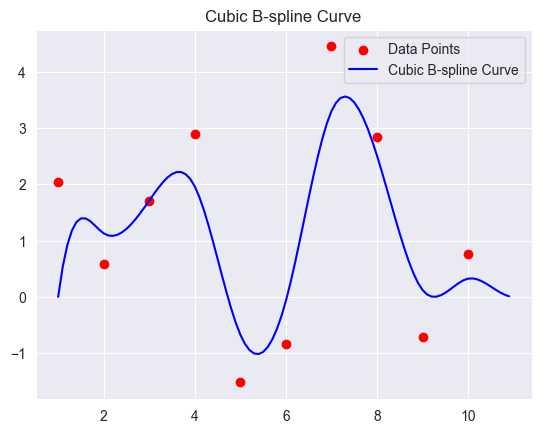

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')

# Generate synthetic data
np.random.seed(42)

# Function to calculate cubic B-spline basis functions using De Boor's algorithm
def de_boor(t, k, i, x, knots):
    if k == 0:
        return 1.0 if knots[i] <= x < knots[i + 1] else 0.0

    alpha = (x - knots[i]) / max((knots[i + k] - knots[i]), np.finfo(float).eps)
    beta = 1 - alpha

    return alpha * de_boor(t, k - 1, i + 1, x, knots) + beta * de_boor(t, k - 1, i, x, knots)

def basis_function(i, k, t, knots):
    if k == 0:
        return 1.0 if knots[i] <= t < knots[i + 1] else 0.0

    denom1 = knots[i + k] - knots[i]
    denom2 = knots[i + k + 1] - knots[i + 1]

    term1 = 0 if denom1 == 0 else ((t - knots[i]) / denom1) * basis_function(i, k - 1, t, knots)
    term2 = 0 if denom2 == 0 else ((knots[i + k + 1] - t) / denom2) * basis_function(i + 1, k - 1, t, knots)

    return term1 + term2

def bspline(t, k, control_points, knots):
    print(f"We're evaluating {t}")
    n = len(control_points) - 1
    result = 0.0
    for i in range(n + 1):
        print(f'Control point: {i}')
        print(f'S({x}): {control_points[i] * de_boor(3, k, i, x, knots)}')
        result += control_points[i] * basis_function(i, k, t, knots)
    return result

# Given data points
x_data = np.sort(range(1,11))

# Control points (assumed to be at knots)
y_data = np.sin(x_data) + np.random.normal(0, 2.4, len(x_data))
control_points = y_data

# Knots
knots = np.array([1,1,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,11,11])

# Calculate B-spline values at each x point
x_points = np.arange(1, 11, 0.1)
y_points_bspline = [bspline(x, 3, control_points, knots) for x in x_points]

# Print the results
print("X values:", x_data)
print("y values:", y_data)
print("y_points_bspline:", y_points_bspline)

# Plotting
plt.scatter(x_data, y_data, label="Data Points", color="red")
plt.plot(x_points, y_points_bspline, label="Cubic B-spline Curve", color="blue")
plt.title("Cubic B-spline Curve")
plt.legend()
plt.show()


In [13]:
x_points

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9])

In [30]:
x_points

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9])

In [31]:
y_data

array([ 2.03358495,  0.5774631 ,  1.6955725 ,  2.89846916, -1.52089237,
       -0.84134419,  4.44709736,  2.8312016 , -0.71462004,  0.75812299])

[ 1  2  3  4  5  6  7  8  9 10]
We're evaluating 1.0
Control point: 0
S(10.0): 0.0
Control point: 1
S(10.0): 0.0
Control point: 2
S(10.0): 0.0
Control point: 3
S(10.0): 0.0
Control point: 4
S(10.0): 0.0
Control point: 5
S(10.0): 0.0
Control point: 6
S(10.0): 0.0
Control point: 7
S(10.0): 0.0
Control point: 8
S(10.0): 0.0
Control point: 9
S(10.0): 0.0
We're evaluating 1.1
Control point: 0
S(10.0): 0.0
Control point: 1
S(10.0): 0.0
Control point: 2
S(10.0): 0.0
Control point: 3
S(10.0): 0.0
Control point: 4
S(10.0): 0.0
Control point: 5
S(10.0): 0.0
Control point: 6
S(10.0): 0.0
Control point: 7
S(10.0): 0.0
Control point: 8
S(10.0): 0.0
Control point: 9
S(10.0): 0.0
We're evaluating 1.2000000000000002
Control point: 0
S(10.0): 0.0
Control point: 1
S(10.0): 0.0
Control point: 2
S(10.0): 0.0
Control point: 3
S(10.0): 0.0
Control point: 4
S(10.0): 0.0
Control point: 5
S(10.0): 0.0
Control point: 6
S(10.0): 0.0
Control point: 7
S(10.0): 0.0
Control point: 8
S(10.0): 0.0
Control point: 9
S(1

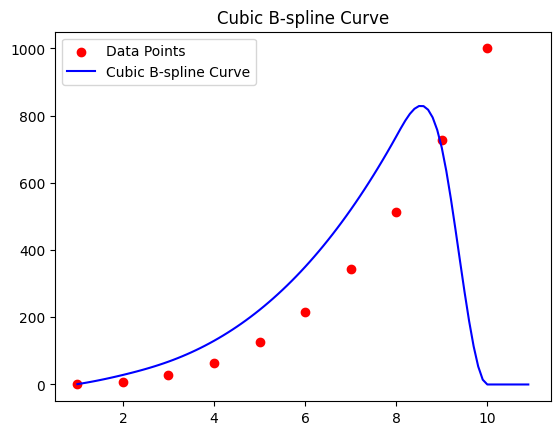

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x_data = np.sort(range(1,11))
print(x_data)
#y_data = np.sin(x_data) + np.random.normal(0, 2.4, len(x_data))
y_data = x_data ** 3

def basis_function(i, k, t, knots):
    if k == 0:
        return 1.0 if knots[i] <= t < knots[i + 1] else 0.0

    denom1 = knots[i + k] - knots[i]
    denom2 = knots[i + k + 1] - knots[i + 1]

    term1 = 0 if denom1 == 0 else ((t - knots[i]) / denom1) * basis_function(i, k - 1, t, knots)
    term2 = 0 if denom2 == 0 else ((knots[i + k + 1] - t) / denom2) * basis_function(i + 1, k - 1, t, knots)

    return term1 + term2

def bspline(t, k, control_points, knots):
    print(f"We're evaluating {t}")
    n = len(control_points) - 1
    result = 0.0
    for i in range(n + 1):
        print(f'Control point: {i}')
        print(f'S({x}): {control_points[i] * de_boor(3, k, i, x, knots)}')
        result += control_points[i] * basis_function(i, k, t, knots)
    return result

# Given data points
data_points = np.array([(1, 2), (2, 3), (3, 1), (4, 5), (5, 4)])

# Control points (assumed to be at knots)
control_points = y_data

# Knots
knots = np.array([1, 1, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10])

# Calculate B-spline values at each x point
x_points = np.arange(1, 11, 0.1)
y_points_bspline = [bspline(x, 3, control_points, knots) for x in x_points]

# Print the results
print("X values:", x_data)
print("y values:", y_data)
print("y_points_bspline:", y_points_bspline)

# Plotting
plt.scatter(x_data, y_data, label="Data Points", color="red")
plt.plot(x_points, y_points_bspline, label="Cubic B-spline Curve", color="blue")
plt.title("Cubic B-spline Curve")
plt.legend()
plt.show()


In [50]:
control_points = [np.mean(y_data[(x_data >= knots[i]) & (x_data < knots[i + 1])]) for i in range(9)]

In [55]:
control_points

[nan,
 nan,
 0.3700082175133646,
 -0.2947499476360383,
 0.6486429418471854,
 nan,
 nan,
 nan,
 nan]

In [52]:
x_data

array([1.04555425, 1.04969905, 1.06256917, 1.08277346, 1.13910955,
       1.14929046, 1.18526045, 1.2188437 , 1.22877214, 1.28286267,
       1.30949669, 1.33198253, 1.36697627, 1.4070456 , 1.41805371,
       1.46330876, 1.52275251, 1.57202515, 1.58546434, 1.66640187,
       1.67095579, 1.69281919, 1.75725968, 1.79643252, 1.81260793,
       1.83792491, 1.84307291, 1.87904903, 1.91324389, 1.97102284,
       1.99046732, 2.02126169, 2.04282154, 2.07634821, 2.07878831,
       2.09834411, 2.2376885 , 2.25544475, 2.26831802, 2.30405385,
       2.40395068, 2.40416776, 2.44727246, 2.45099159, 2.45465843,
       2.53471711, 2.56929786, 2.59399611, 2.6364247 , 2.65064059,
       2.6636901 , 2.67866659, 2.67913053, 2.75718689, 2.76384576,
       2.78844113, 2.79706404, 2.911052  , 2.99897029, 3.01842379,
       3.03846198, 3.05141646, 3.05918349, 3.13524179, 3.1387379 ,
       3.15605702, 3.17667062, 3.17849744, 3.19590679, 3.24363006,
       3.26604066, 3.32147465, 3.32901983, 3.38682131, 3.44214

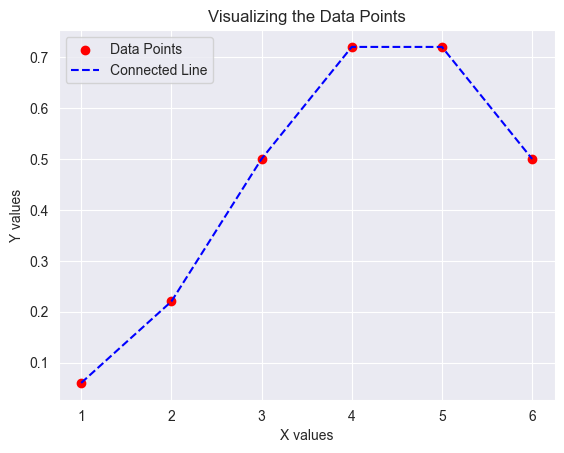

In [56]:
import matplotlib.pyplot as plt

# Given sequence of numbers
y_values = [0.06, 0.22, 0.5, 0.72, 0.72, 0.5]

# X values assuming equally spaced points
x_values = list(range(1, len(y_values) + 1))

# Plotting
plt.scatter(x_values, y_values, label="Data Points", color="red")
plt.plot(x_values, y_values, label="Connected Line", color="blue", linestyle="--")
plt.title("Visualizing the Data Points")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()
